In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
path = Path('Database')

In [5]:
path.ls()

[PosixPath('Database/GoodPLR_0.404_7581.jpg'),
 PosixPath('Database/GoodPLR_0.433_2440.jpg'),
 PosixPath('Database/GoodPLR_0.352_5594.jpg'),
 PosixPath('Database/GoodPLR_0.46_5072.jpg'),
 PosixPath('Database/GoodPLR_0.37_914.jpg'),
 PosixPath('Database/GoodPLR_0.404_840.jpg'),
 PosixPath('Database/GoodPLR_0.404_9135.jpg'),
 PosixPath('Database/GoodPLR_0.509_6291.jpg'),
 PosixPath('Database/GoodPLR_0.389_3233.jpg'),
 PosixPath('Database/GoodPLR_0.46_1675.jpg'),
 PosixPath('Database/GoodPLR_0.391_4683.jpg'),
 PosixPath('Database/GoodPLR_0.439_7106.jpg'),
 PosixPath('Database/GoodPLR_0.442_3577.jpg'),
 PosixPath('Database/GoodPLR_0.259_2725.jpg'),
 PosixPath('Database/GoodPLR_0.463_3786.jpg'),
 PosixPath('Database/GoodPLR_0.52_3953.jpg'),
 PosixPath('Database/GoodPLR_0.434_7464.jpg'),
 PosixPath('Database/GoodPLR_0.349_8029.jpg'),
 PosixPath('Database/GoodPLR_0.421_4339.jpg'),
 PosixPath('Database/GoodPLR_0.339_9193.jpg'),
 PosixPath('Database/GoodPLR_0.404_3004.jpg'),
 PosixPath('Databas

In [6]:
fnames = get_image_files(path)
fnames[:5]

[PosixPath('Database/GoodPLR_0.404_7581.jpg'),
 PosixPath('Database/GoodPLR_0.433_2440.jpg'),
 PosixPath('Database/GoodPLR_0.352_5594.jpg'),
 PosixPath('Database/GoodPLR_0.46_5072.jpg'),
 PosixPath('Database/GoodPLR_0.37_914.jpg')]

In [44]:
# variable a will determine the nearest digit that the float will be rounded to. 
# small a will result in many classes
def round_nearest(x, a):
    return round(x / a) * a

In [7]:
#pat = r'/([^/]+)_\d+.jpg$'
def get_float_labels(y):
    return (float(y.parts[-1].split('_')[1]))
    




In [ ]:
??ImageDataBunch.from_name_func

In [14]:
np.random.seed(42)
bs = 40
bs = 40
tfms = get_transforms(do_flip=False)
fnames = get_image_files(path)
fnames

[PosixPath('Database/GoodPLR_0.404_7581.jpg'),
 PosixPath('Database/GoodPLR_0.433_2440.jpg'),
 PosixPath('Database/GoodPLR_0.352_5594.jpg'),
 PosixPath('Database/GoodPLR_0.46_5072.jpg'),
 PosixPath('Database/GoodPLR_0.37_914.jpg'),
 PosixPath('Database/GoodPLR_0.404_840.jpg'),
 PosixPath('Database/GoodPLR_0.404_9135.jpg'),
 PosixPath('Database/GoodPLR_0.509_6291.jpg'),
 PosixPath('Database/GoodPLR_0.389_3233.jpg'),
 PosixPath('Database/GoodPLR_0.46_1675.jpg'),
 PosixPath('Database/GoodPLR_0.391_4683.jpg'),
 PosixPath('Database/GoodPLR_0.439_7106.jpg'),
 PosixPath('Database/GoodPLR_0.442_3577.jpg'),
 PosixPath('Database/GoodPLR_0.259_2725.jpg'),
 PosixPath('Database/GoodPLR_0.463_3786.jpg'),
 PosixPath('Database/GoodPLR_0.52_3953.jpg'),
 PosixPath('Database/GoodPLR_0.434_7464.jpg'),
 PosixPath('Database/GoodPLR_0.349_8029.jpg'),
 PosixPath('Database/GoodPLR_0.421_4339.jpg'),
 PosixPath('Database/GoodPLR_0.339_9193.jpg'),
 PosixPath('Database/GoodPLR_0.404_3004.jpg'),
 PosixPath('Databas

data = ImageDataBunch.from_name_func(path, fnames, get_float_labels, ds_tfms=get_transforms(), size=224,
                                  ).normalize(imagenet_stats)

In [16]:
data = (ImageItemList(fnames)
        .random_split_by_pct(0.3)
        .label_from_func(get_float_labels)
        .transform(tfms, size=224)
        .databunch())

In [17]:
data.bs = bs

In [19]:
learn = create_cnn(data, models.resnet50, metrics=[mean_squared_error])

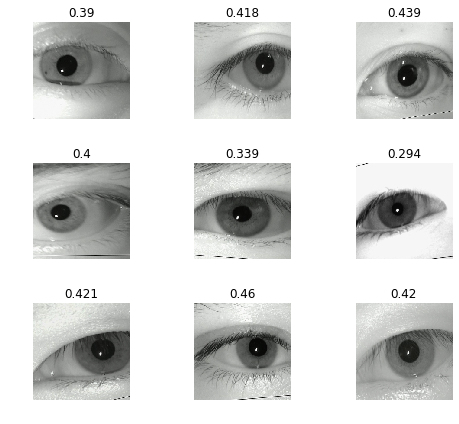

In [20]:
data.show_batch(rows=3, figsize=(7,6))

In [21]:
learn = create_cnn(data, models.resnet50,metrics=error_rate)

In [50]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate


RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'other'

In [52]:
interp = ClassificationInterpretation.from_learner(learn)

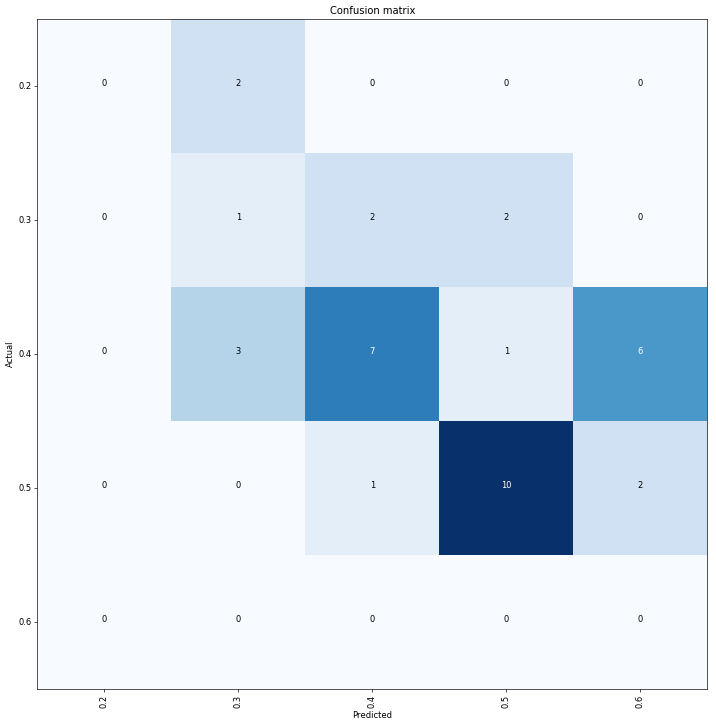

In [53]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [ ]:
learn.recorder.plot()

In [ ]:
learn.save('PLRstage1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,2e-2))

In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('PLRstage1')

In [ ]:
import os, random

In [ ]:
randomchoice = random.choice(os.listdir("/home/ubuntu/Eyetrain/Database/"))
randomchoice

In [ ]:
img = open_image('/home/ubuntu/Eyetrain/Database/'+randomchoice)
img

In [ ]:
log_preds = learn.predict(img)
log_preds

In [ ]:
log_preds[0]

In [ ]:
e^0.268269